# IDH Classification

Using the classification below, we use the ID3 tree decision to classificate the presented IDH

    0,800 – 1,000 (muito alto)
    0,700 – 0,799 (alto)
    0,555 – 0,699 (médio)
    0,350 – 0,554 (baixo)
    0,0 – 0,349 (muito baixo)


In [35]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import random
from sklearn.metrics import precision_score, recall_score, accuracy_score

columns=['PopEstimada_2018','PopCenso_2010','IDHM','ReceitasRealizadas_2014','DespesasEmpenhadas_2014','Pib_2014','LocalUF_AC','LocalUF_AL','LocalUF_AM','LocalUF_AP','LocalUF_BA','LocalUF_CE','LocalUF_DF','LocalUF_ES','LocalUF_GO','LocalUF_MA','LocalUF_MG','LocalUF_MS','LocalUF_MT','LocalUF_PA','LocalUF_PB','LocalUF_PE','LocalUF_PI','LocalUF_PR','LocalUF_RJ','LocalUF_RN','LocalUF_RO','LocalUF_RR','LocalUF_RS','LocalUF_SC','LocalUF_SE','LocalUF_SP','LocalUF_TO']

In [36]:
# Loading the formatted data
data = pd.read_csv (r'data/DATA_F.csv')
df = pd.DataFrame(data, columns=columns)
df

PopEstimada_2018  PopCenso_2010  IDHM  ReceitasRealizadas_2014  \
0                23167          24392     3                    53490   
1                 5438           6313     3                    22635   
2                84813          78574     4                   169636   
3                16444          17029     3                    53147   
4                16227          18591     3                    34612   
...                ...            ...   ...                      ...   
4613             13746          12548     4                    37777   
4614              8611           7371     3                    26783   
4615              6026           4735     3                    17295   
4616              5758           5145     3                    19148   
4617           2974703        2570160     5                 20665448   

      DespesasEmpenhadas_2014  Pib_2014  LocalUF_AC  LocalUF_AL  LocalUF_AM  \
0                       47577  16461.11           0           0           0   
1                       19354  18346.17           0           0           0   
2                      155473  20725.23           0           0           0   
3                       46774  22179.17           0           0           0   
4                       34381  15300.88           0           0           0   
...                       ...       ...         ...         ...         ...   
4613                    33220  23237.24           0           0           0   
4614                    23511  39480.36           0           0           0   
4615                    15646  18992.37           0           0           0   
4616                    16785  35691.39           0           0           0   
4617                 19008773  73971.05           0           0           0   

      LocalUF_AP  ...  LocalUF_PR  LocalUF_RJ  LocalUF_RN  LocalUF_RO  \
0              0  ...           0           0           0           1   
1              0  ...           0           0           0           1   
2              0  ...           0           0           0           1   
3              0  ...           0           0           0           1   
4              0  ...           0           0           0           1   
...          ...  ...         ...         ...         ...         ...   
4613           0  ...           0           0           0           0   
4614           0  ...           0           0           0           0   
4615           0  ...           0           0           0           0   
4616           0  ...           0           0           0           0   
4617           0  ...           0           0           0           0   

      LocalUF_RR  LocalUF_RS  LocalUF_SC  LocalUF_SE  LocalUF_SP  LocalUF_TO  
0              0           0           0           0           0           0  
1              0           0           0           0           0           0  
2              0           0           0           0           0           0  
3              0           0           0           0           0           0  
4              0           0           0           0           0           0  
...          ...         ...         ...         ...         ...         ...  
4613           0           0           0           0           0           0  
4614           0           0           0           0           0           0  
4615           0           0           0           0           0           0  
4616           0           0           0           0           0           0  
4617           0           0           0           0           0           0  

[4618 rows x 33 columns]

In [37]:
# Embaralhando dados
df = df.sample(frac = 1).reset_index(drop = True)

target = df.pop('IDHM')

# Representando as strings como inteiros 
target = target.astype('int')


# Treino 90% e teste 10%
qtd_treino = int(len(df) * 0.9)
x_treinamento = df[:qtd_treino]
x_teste = df[qtd_treino:]
y_treinamento = target[:qtd_treino]
y_teste = target[qtd_treino:]
df

PopEstimada_2018  PopCenso_2010  ReceitasRealizadas_2014  \
0                 6366           6708                    17823   
1                40217          36929                    68802   
2                18438          17238                    45007   
3                 7292           7220                    15432   
4                 4086           4663                    15454   
...                ...            ...                      ...   
4613              4321           3756                    14441   
4614              3341           3632                    13852   
4615              2155           2059                     8759   
4616              6283           6565                    50579   
4617             97448          76202                   214113   

      DespesasEmpenhadas_2014   Pib_2014  LocalUF_AC  LocalUF_AL  LocalUF_AM  \
0                       18048    8784.17           0           0           0   
1                       80437   18013.97           0           0           0   
2                       42639    4424.04           0           0           0   
3                       14396    7660.84           0           0           0   
4                       13688    7982.61           0           0           0   
...                       ...        ...         ...         ...         ...   
4613                    12345   69118.83           0           0           0   
4614                    13078   23260.08           0           0           0   
4615                     7557    5679.24           0           0           0   
4616                    38464  139770.09           0           0           0   
4617                   203544   23055.20           0           0           0   

      LocalUF_AP  LocalUF_BA  ...  LocalUF_PR  LocalUF_RJ  LocalUF_RN  \
0              0           0  ...           0           0           0   
1              0           0  ...           0           0           0   
2              0           0  ...           0           0           0   
3              0           0  ...           0           0           0   
4              0           1  ...           0           0           0   
...          ...         ...  ...         ...         ...         ...   
4613           0           0  ...           0           0           0   
4614           0           0  ...           0           0           0   
4615           0           0  ...           0           0           0   
4616           0           0  ...           0           0           0   
4617           0           0  ...           0           0           0   

      LocalUF_RO  LocalUF_RR  LocalUF_RS  LocalUF_SC  LocalUF_SE  LocalUF_SP  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
4613           0           0           0           0           0           0   
4614           0           0           1           0           0           0   
4615           0           0           0           0           0           0   
4616           0           0           1           0           0           0   
4617           1           0           0           0           0           0   

      LocalUF_TO  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
4613           1  
4614           0  
4615           0  
4616           0  
4617           0  

[4618 rows x 32 columns]

In [38]:
# Árvore de decisão com o critério de entropia
clf = tree.DecisionTreeClassifier(criterion="entropy", class_weight='balanced')

In [39]:
# Treinamento
irisTree = clf.fit(x_treinamento, y_treinamento)

In [40]:
# Predição
y_pred = irisTree.predict(x_teste)

In [41]:
print(y_pred)
print(y_teste)

[2 3 3 3 3 4 3 3 3 4 3 3 3 3 2 4 4 3 4 3 3 4 4 4 3 3 3 4 4 4 4 4 2 3 2 4 3
 2 3 3 3 3 3 4 3 3 3 3 4 3 3 3 2 3 3 3 3 4 4 3 3 3 3 3 3 3 4 2 4 3 4 3 4 3
 4 4 3 3 2 2 3 3 4 4 4 4 3 3 3 4 3 3 3 4 3 3 3 4 4 4 3 3 3 3 2 3 2 3 3 3 3
 3 4 3 3 3 3 4 3 4 4 3 4 3 4 3 3 3 3 2 3 3 3 4 3 3 3 3 3 4 3 4 3 4 3 3 2 4
 4 4 3 2 3 3 4 4 3 4 4 3 3 3 4 4 4 3 3 3 2 3 3 4 3 3 3 4 3 3 3 3 4 2 3 3 3
 4 3 3 2 5 3 3 3 4 3 3 3 3 4 3 3 2 3 4 3 2 3 4 4 3 4 3 3 4 4 3 2 3 2 3 3 4
 4 3 3 4 4 4 3 3 4 3 3 3 3 4 4 3 4 4 4 3 2 4 4 3 4 3 3 3 4 3 3 3 2 4 4 4 4
 4 3 3 4 3 4 2 3 3 3 3 4 3 4 2 3 3 2 3 3 3 3 4 3 3 3 3 3 3 4 4 4 3 3 4 3 3
 4 3 4 4 4 4 3 3 3 3 3 3 3 5 3 3 4 4 3 4 3 3 4 3 4 3 3 3 4 3 3 4 3 3 2 4 3
 2 3 4 3 3 3 2 3 5 3 3 3 4 4 3 4 3 4 2 4 3 2 3 3 3 2 3 4 3 4 4 3 3 4 3 4 3
 5 4 4 3 4 4 4 3 2 4 3 4 4 3 4 2 4 3 3 3 4 3 3 3 3 3 4 3 3 4 4 4 3 3 4 3 3
 3 3 3 4 4 4 4 4 4 4 2 3 4 4 3 3 3 3 4 3 4 3 4 3 3 4 4 2 4 4 4 4 3 2 4 4 3
 4 3 3 3 4 4 4 3 4 3 4 4 4 3 4 3 4 3]
4156    3
4157    3
4158    3
4159    4
4160    3
       ..
46

In [42]:
MC = confusion_matrix(y_teste, y_pred)
print(MC)

[[ 14  17   2   0]
 [ 21 189  38   0]
 [  2  51 121   3]
 [  0   0   3   1]]


In [43]:
# acuracia = (MC[0][0] + MC[1][1]) / np.sum(MC)
# precisao = MC[0][0] / (np.sum(MC[0]))
# recall = MC[0][0] / (np.sum(MC[:, 0]))
# p = precision_score(y_teste, y_pred, average='micro')
# r = recall_score(y_teste, y_pred, average='micro')

print('Acuracia:', accuracy_score(y_teste, y_pred))
print('Precisão:', precision_score(y_teste, y_pred, average='micro'))
print('Recall:  ', recall_score(y_teste, y_pred, average='micro'))

Acuracia: 0.7034632034632035
Precisão: 0.7034632034632035
Recall:   0.7034632034632035


In [44]:
print(MC[0][1])

17


] <= 8885.5\nentropy = 0.938\nsamples = 4\nvalue = [0.0, 1.31, 0.72, 0.0]'),
 Text(125.79706722529043, 133.57028571428572, 'entropy = -0.0\nsamples = 3\nvalue = [0.0, 1.31, 0.0, 0.0]'),
 Text(126.81721576842507, 133.57028571428572, 'entropy = 0.0\nsamples = 1\nvalue = [0.0, 0.0, 0.72, 0.0]'),
 Text(127.32729003999239, 139.78285714285715, 'entropy = -0.0\nsamples = 16\nvalue = [0.0, 6.985, 0.0, 0.0]'),
 Text(128.85751285469436, 145.99542857142856, 'X[3] <= 40443.5\nentropy = 0.993\nsamples = 6\nvalue = [0.0, 1.746, 1.44, 0.0]'),
 Text(128.34743858312703, 139.78285714285715, 'entropy = 0.0\nsamples = 2\nvalue = [0.0, 0.0, 1.44, 0.0]'),
 Text(129.36758712626167, 139.78285714285715, 'X[4] <= 14318.01\nentropy = 0.0\nsamples = 4\nvalue = [0.0, 1.746, 0.0, 0.0]'),
 Text(128.85751285469436, 133.57028571428572, 'entropy = 0.0\nsamples = 1\nvalue = [0.0, 0.437, 0.0, 0.0]'),
 Text(129.877661397829, 133.57028571428572, 'entropy = 0.0\nsamples = 3\nvalue = [0.0, 1.31, 0.0, 0.0]'),
 Text(129.367587

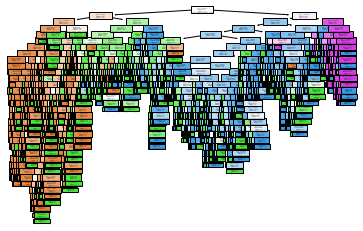

In [45]:
tree.plot_tree(clf, filled=True)